In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=128)

functionCalculated = 0

def f(x):
    x1 = x[0]
    x2 = x[1]
    global functionCalculated
    functionCalculated += 1
    # return x1**2 + x2**2
    # return (x1-1)**2 + 100*(x2-1)**2
    return 100*(x1**2-x2)**2 + (x1-1)**2
    # return (100*(x1-x2)**2 + (x1-1)**2)
    # return (10*(x1-x2)**2 + (x1-1)**2)**4

In [3]:
# print(f"{h}, {h*np.array([1, 0])}, {h*np.array([0, 1])}")
def fderright(x, fx, h):
    gradFx1 = (f(x + h*np.array([1, 0])) - fx) / h
    gradFx2 = (f(x + h*np.array([0, 1])) - fx) / h
    return np.array([gradFx1, gradFx2])

def fderleft(x, fx, h):
    gradFx1 = (fx - f(x - h*np.array([1, 0]))) / h
    gradFx2 = (fx - f(x - h*np.array([0, 1]))) / h
    return np.array([gradFx1, gradFx2])

def fdercenter(x, h):
    gradFx1 = (f(x + h*np.array([1, 0])) - f(x - h*np.array([1, 0]))) / (2*h)
    gradFx2 = (f(x + h*np.array([0, 1])) - f(x - h*np.array([0, 1]))) / (2*h)
    return np.array([gradFx1, gradFx2])

def fder(x, fx, h, type):
    if type == 'right':
        return fderright(x, fx, h)
    if type == 'left':
        return fderleft(x, fx, h)
    if type == 'center':
        return fdercenter(x, h)
    else:
        raise Exception('Not valid type')
    

In [4]:
def norm(x):
    x1 = x[0]
    x2 = x[1]
    return math.sqrt(x1**2 + x2**2)

def stopCriteria1(xk, fxk, xk_1, fxk_1, e):
    if ((norm(xk_1 - xk) / norm(xk)) <= e) and (math.fabs(fxk_1 - fxk) <= e):
        return True
    return False

def stopCriteria2(gradFxk, e):
    if (norm(gradFxk) <= e):
        return True
    return False

In [5]:
# Code for finding optimal Lambda
functionCalculatedForLambda = 0

svenCoefLambda = 0.01 # 0.00001 # 0.000098
l0 = 0

eGoldenCut = 0.001 # 0.1 # 0.11
eDSKPauela = 0.01

'''
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 3*(x1-15)**  2 -x1*x2 +4*x2**2
'''

def FLambda(xk, l, Sk):
    global functionCalculatedForLambda
    functionCalculatedForLambda += 1
    return f(xk + l*Sk)

# trustInterval = sven(np.array([-22, -22]), np.array([0, 1]))
# print(goldenCut(trustInterval, np.array([-22, -22]), np.array([0, 1])))
# print(functionCalculatedForLambda)
    

In [6]:
def sven(xk, Sk):
    deltaL = svenCoefLambda * (norm(xk) / norm(Sk))
    FLambda0 = FLambda(xk, l0, Sk)
    FLambdaPlus = FLambda(xk, l0+deltaL, Sk)
    FLambdaMinus = FLambda(xk, l0-deltaL, Sk)
    
    coef = 0
    currentFValue = 0
    print(f"deltaL: {deltaL}")
    if FLambda0 < FLambdaPlus and FLambda0 < FLambdaMinus:
        print("Sven: both Lambdas are increasing funcion")
        return np.array([-deltaL, deltaL])
    if FLambda0 > FLambdaPlus and FLambda0 > FLambdaMinus:
        raise Exception("Sven: both Lambdas are deacreasing function")
    if FLambda0 > FLambdaPlus:
        coef = 1
        currentFValue = FLambdaPlus
        l1 = l0 + coef * deltaL
    if FLambda0 > FLambdaMinus:
        coef = -1
        currentFValue = FLambdaMinus
    l1 = l0 + coef * deltaL
    currentlValue = l1
    lambdaValues = [l0, l1]
    FNewLambda = 0
    n = 1
    while True:
        newLambda = currentlValue + 2*n*coef * deltaL
        lambdaValues.append(newLambda)
        FNewLambda = FLambda(xk, newLambda, Sk)
        if (currentFValue < FNewLambda):
            break
        currentlValue = newLambda
        currentFValue = FNewLambda
        n = 2*n
    print(f"SVEN - deltaL: {deltaL}, Lambdas: {lambdaValues}, functionCalculatedForLambda: {functionCalculatedForLambda}")
    return np.array([lambdaValues[-3], (lambdaValues[-2] + lambdaValues[-1]) / 2])

In [7]:
def goldenCut(lTrustInterval, xk, Sk):
    a = lTrustInterval[0]
    b = lTrustInterval[1]
    biggerCut = (math.sqrt(5) - 1) / 2
    smallerCut = 1 - biggerCut
    L = b - a
    x1 = a + smallerCut * L
    x2 = a + biggerCut * L
    Fx1 = FLambda(xk, x1, Sk)
    Fx2 = FLambda(xk, x2, Sk)

    while (L > eGoldenCut):
        if Fx1 < Fx2:
            b = x2
            x2 = x1
            L = b - a
            x1 = a + smallerCut * L
            Fx2 = Fx1
            Fx1 = FLambda(xk, x1, Sk)
        else:
            a = x1
            x1 = x2
            L = b - a
            x2 = a + biggerCut * L
            Fx1 = Fx2
            Fx2 = FLambda(xk, x2, Sk)
    print(f"GOLDENCUT - INTERVAL: {np.array([x1, x2])}, functionCalculatedForLambda: {functionCalculatedForLambda}")
    return np.array([x1, x2])

In [8]:
def dskStopCriteria(x2, Fx2, x_new, Fx_new):
    if (math.fabs(Fx2 - Fx_new) <= eDSKPauela) and (math.fabs(x2 - x_new) <= eDSKPauela):
        return True
    return False


# NOTE: OPTIMIZE DSKPAUELA
def DSKPauela(lTrustInterval, xk, Sk):
    # First iteration
    x1 = lTrustInterval[0]
    x2 = (lTrustInterval[0] + lTrustInterval[1]) / 2
    x3 = lTrustInterval[1]

    Fx1 = FLambda(xk, x1, Sk)
    Fx2 = FLambda(xk, x2, Sk)
    Fx3 = FLambda(xk, x3, Sk)

    deltaX = x2 - x1
    x_new = x2 + (deltaX * (Fx1 - Fx3)) / (2*(Fx1 - 2*Fx2 + Fx3))

    while True:
        Fx_new = FLambda(xk, x_new, Sk)
        if dskStopCriteria(x2, Fx2, x_new, Fx_new):
            print(f"DSKPAUELA - Lambda: {x_new}, functionCalculatedForLambda: {functionCalculatedForLambda}")
            return x_new
        
        if x1 < x_new and x_new < x2:
            x1 = x1
            x3 = x2
            x2 = x_new

            Fx1 = Fx1
            Fx2 = Fx_new
            Fx3 = Fx2
        elif x2 < x_new and x_new < x3:
            x1 = x2
            x3 = x3
            x2 = x_new

            Fx1 = Fx2
            Fx2 = Fx_new
            Fx3 = Fx3
        else:
            raise Exception(f"DSKPauela: can't choose points: x1: {x1} x2: {x2}, x3: {x3}, x_new: {x_new}")
        
        a1 = (Fx2 - Fx1) / (x2 - x1)
        a2 = (1 / (x3 - x2)) * ((Fx3 - Fx1) / (x3 - x1) - (Fx2 - Fx1) / (x2 - x1))
        x_new = (x1 + x2) / 2 - a1 / (2*a2)

In [39]:
import time
def MOPlconst(e):
    xk = x0
    l = 1
    Fxk = f(xk)
    countGrad = True
    while True:
        if countGrad:
            gradFxk = fderright(xk, Fxk, h)# fdercenter(xk, h)
        xk_new = xk + l * (-gradFxk / norm(gradFxk))
        Fxk_new = f(xk_new)
        
        print(f'{xk_new}, {l}, {Fxk}, {Fxk_new}')
        
        if stopCriteria1(xk, Fxk, xk_new, Fxk_new, e):
            return xk_new
        if (Fxk <= Fxk_new):
            # What should I do with L?
            l = l / 2
            countGrad = False
        else: 
            xk = xk_new
            Fxk = Fxk_new
            countGrad = True

# fderright(xk, Fxk, h)
# fderleft(xk, Fxk, h)
# stopCriteria2(gradFxk, e)
def MOPlopt(x0, derType, h, e):
    i = 0
    xk = x0
    Fxk = f(xk)
    gradFxk = fder(xk, Fxk, h, type=derType) # fderleft(xk, Fxk, h) # fdercenter(xk, h) # fderleft(xk, Fxk, h)
    while True:
        #  fderright(xk, Fxk, h) fdercenter(xk, h)
        i += 1
        print(f"\nITERATION NUMBER {i}")
        Sk = - gradFxk
        l = goldenCut(sven(xk, Sk), xk, Sk)
        xk_new = xk + l * Sk
        Fxk_new = f(xk_new)
        
        gradFxk_new = fder(xk_new, Fxk_new, h, type=derType)
        print(f'Xk: {xk}, Xk+1: {xk_new}, Lambda: {l}, Fxk: {Fxk}, Fxk+1: {Fxk_new}, GradFxk: {gradFxk}, GradFxk+1: {gradFxk_new}')
        
        if stopCriteria1(xk, Fxk, xk_new, Fxk_new, e):
            return xk_new
        xk = xk_new
        Fxk = Fxk_new
        gradFxk = gradFxk_new

        if functionCalculated > 100000:
            print('EXITED BEAUSE TOO MUCH OPEARTIONS')
            time.sleep(3)
            return xk

x0 = np.array([-1.2, 0])
h = 0.000000001
e = 0.0001 
functionCalculated = 0
res = MOPlopt(x0, 'center', h, e)
print(functionCalculated)
print(np.round(res, 5))
print(round(f(res), 5))


ITERATION NUMBER 1
deltaL: 1.5939143871383578e-05
SVEN - deltaL: 1.5939143871383578e-05, Lambdas: [0, 1.5939143871383578e-05, 4.781743161415073e-05, 0.00011157400709968504, 0.00023908715807075367, 0.0004941134600128909, 0.0010041660638971652, 0.0020242712716657145], functionCalculatedForLambda: 86254
GOLDENCUT - INTERVAL: [0.000734927633247815  0.0008837589772797032], functionCalculatedForLambda: 86257
Xk: [-1.2  0. ], Xk+1: [-0.6887842803487216  0.2545226065158477], Lambda: [0.000734927633247815  0.0008837589772797032], Fxk: 212.2, Fxk+1: 7.687645169069986, GradFxk: [-695.6000788704841  -288.00002382922685], GradFxk+1: [-63.96335683334086 -43.98023634166748]

ITERATION NUMBER 2
deltaL: 9.459714430251676e-05
SVEN - deltaL: 9.459714430251676e-05, Lambdas: [0, 9.459714430251676e-05, 0.0002837914329075503, 0.0006621800101176173, 0.0014189571645377512, 0.0029325114733780196], functionCalculatedForLambda: 86264
GOLDENCUT - INTERVAL: [0.0015976080167997586 0.0018184326144338714], functionCa

In [10]:
start = 0.01
stop = 0.000000000000001
step = 0.1
array = []
while start >= stop:
    array.append(start)
    start *= step
h_values = np.array(array)

h_values = np.array([0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001,
                     0.0000000001, 0.00000000001, 0.000000000001, 0.0000000000001, 0.00000000000001,
                     0.000000000000001])

e = 0.001
rightMinimum = []
leftMinimum = []
centerMinimum = []

rightFcalc = []
leftFcalc = []
centerFcalc = []
print(h_values)
global functionCalculated
for h in h_values:
    functionCalculated = 0
    res = MOPlopt(x0, 'center', h, e)
    centerMinimum.append(res)
    centerFcalc.append(functionCalculated)


for h in h_values:
    functionCalculated = 0
    res = MOPlopt(x0, 'right', h, e)
    rightMinimum.append(res)
    rightFcalc.append(functionCalculated)

for h in h_values:
    functionCalculated = 0
    res = MOPlopt(x0, 'left', h, e)
    leftMinimum.append(res)
    leftFcalc.append(functionCalculated)
    
    

[1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10 1.e-11
 1.e-12 1.e-13 1.e-14 1.e-15]

ITERATION NUMBER 1
deltaL: 1.5938206727260448e-05
SVEN - deltaL: 1.5938206727260448e-05, Lambdas: [0, 1.5938206727260448e-05, 4.7814620181781344e-05, 0.00011156744709082313, 0.0002390731009089067, 0.0004940844085450739, 0.0010041070238174083, 0.002024152254362077], functionCalculatedForLambda: 1347
GOLDENCUT - INTERVAL: [0.0007348844230780605 0.0008837070165509148], functionCalculatedForLambda: 1350
Xk: [-1.2  0. ], Xk+1: [-0.6887791208545945   0.25450762076666433], Lambda: [0.0007348844230780605 0.0008837070165509148], Fxk: 212.2, Fxk+1: 7.6879742346821764, GradFxk: [-695.6479999999984  -288.00000000000097], GradFxk+1: [-63.99261606429172  -43.981811311712704]

ITERATION NUMBER 2
deltaL: 9.456539114070869e-05
SVEN - deltaL: 9.456539114070869e-05, Lambdas: [0, 9.456539114070869e-05, 0.00028369617342212605, 0.0006619577379849608, 0.0014184808671106304, 0.0029315271253619697], functionCa

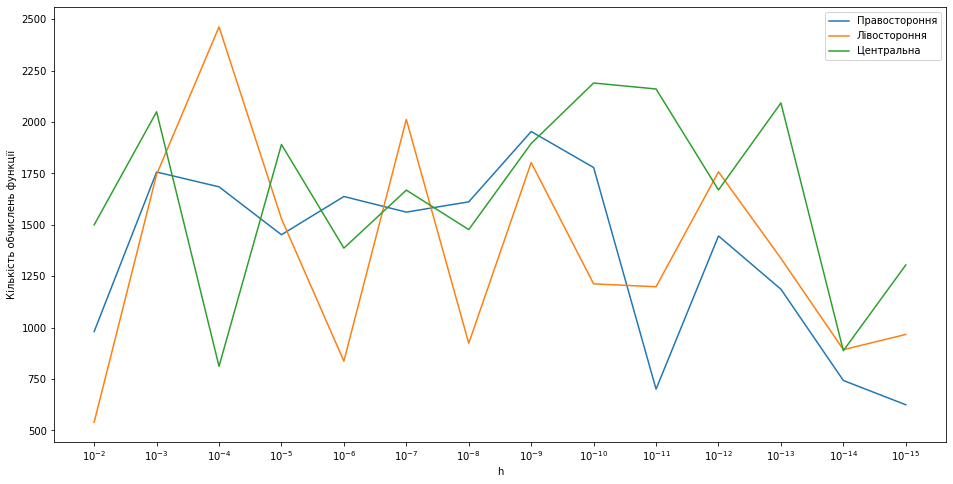

In [11]:
# Build plots
plt.figure(figsize=(16, 8))
plt.semilogx(h_values, rightFcalc, label='Правостороння')
plt.semilogx(h_values, leftFcalc, label='Лівостороння')
plt.semilogx(h_values, centerFcalc, label='Центральна')

plt.xticks(h_values)
# Adding a legend and labels
plt.legend()
plt.xlabel('h')
plt.ylabel('Кількість обчислень функції')
plt.gca().invert_xaxis()
# Displaying the plot
plt.show()

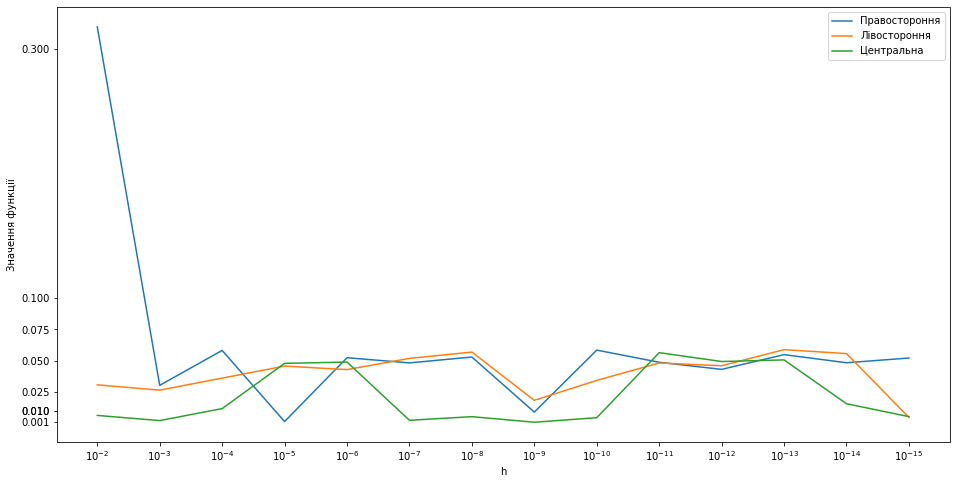

0.04870188012413953


In [25]:
resultsRigthMiminum = list(map(lambda x: f(x), rightMinimum))
resultsLeftMiminum = list(map(lambda x: f(x), leftMinimum))
resultsCenterMiminum = list(map(lambda x: f(x), centerMinimum))

plt.figure(figsize=(16, 8))
plt.semilogx(h_values, resultsRigthMiminum, label='Правостороння')
plt.semilogx(h_values, resultsLeftMiminum, label='Лівостороння')
plt.semilogx(h_values, resultsCenterMiminum, label='Центральна')

plt.xticks(h_values)
plt.yticks([0.001, 0.01, 0.01, 0.025, 0.05, 0.075, 0.1, 0.3])
# Adding a legend and labels
plt.legend()
plt.xlabel('h')
plt.ylabel('Значення функції')
plt.gca().invert_xaxis()
# Displaying the plot
plt.show()
print(resultsRigthMiminum[9])